In [1]:
# import the necessary packages
import numpy as np
import cv2

![rectangle Coordinates.png](<attachment:rectangle Coordinates.png>)
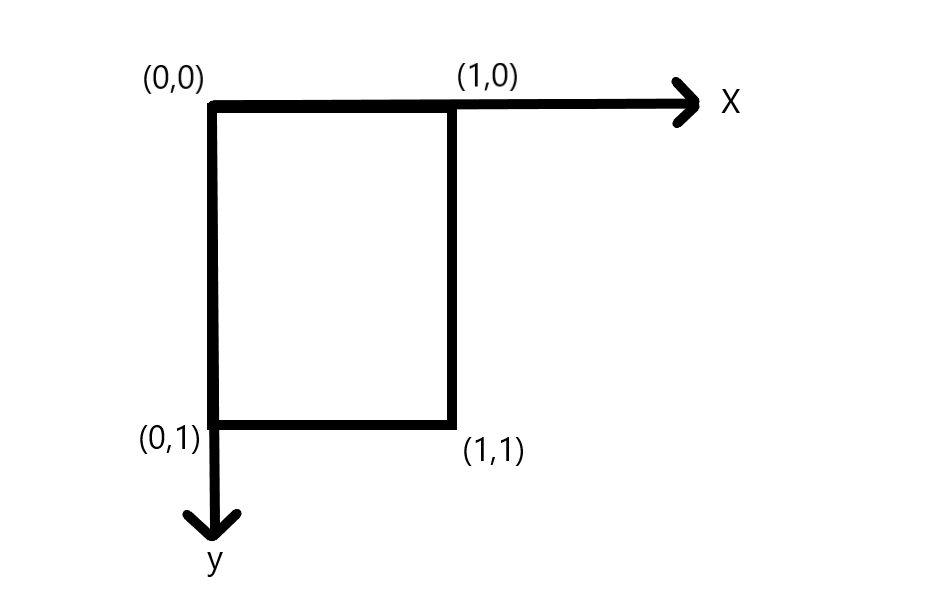

In [6]:
# this function maintain a consistent ordering of rectangles points

def order_points(pts):            # pts ==>  which is a list of four points specifying the (x, y) coordinates of each point of the rectangle.
    
    # initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the *top-left*,
	# the second entry is the *top-right*, the third is the
	# *bottom-right*, and the fourth is the *bottom-left*

    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum

    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
	# top-right point will have the *smallest difference*,
	# whereas the bottom-left will have the *largest difference*
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

# it is important  to maintain a consistent ordering of points.

In [7]:
def four_point_transform(image, pts):  # The image variable is the image we want to apply the perspective transform to.
                                       # the pts list is the list of four points that contain the ROI of the image we want to transform.

    # obtain a consistent order of the points and unpack them individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	
    # compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	
    # compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	
    # now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	
    # compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	
	# return the warped image
	return warped
	

